# Install graphviz with anaconda

```
> conda install graphviz
> conda install python-graphviz
```


# Regular Expression

In [1]:
import re

s = "<TAG>one<TAG>two</TAG>one</TAG>"
re.findall(r'>(.*)<', s)

['one<TAG>two</TAG>one']

In [2]:
s = "<TAG>one<TAG>two</TAG>one</TAG>"
re.findall(r'>(.*?)<', s)

['one', 'two', 'one']

In [3]:
s = "127.0.0.1"
re.findall(r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b', s)

['127.0.0.1']

In [4]:
s = "12700.0.0.1"
re.findall(r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b', s)

[]

## A little bit more complex

In [5]:
s = '''
ImpressionShare_Campaign =
    SELECT DateKey,
           HourNum,
           0L AS AboveCnt,
           0L AS TopCnt
FROM PairAggCampaignAgg;
'''

re_select = re.compile(r'(.*)=.*SELECT.*FROM (.*);', re.DOTALL | re.MULTILINE)

match = re_select.match(s)
list(match.groups())

['\nImpressionShare_Campaign ', 'PairAggCampaignAgg']

In [6]:
re_select = re.compile(r'\n(.*)=.*SELECT.*FROM (.*);', re.DOTALL | re.MULTILINE)

match = re_select.match(s)
list(match.groups())

['ImpressionShare_Campaign ', 'PairAggCampaignAgg']

In [7]:
s = '''
a = SELECT *
    FROM Step1
    UNION ALL
    SELECT *
    FROM ImpressionShare
'''

re_select = re.compile(r'\n(.*?)=.*?SELECT.*?FROM (.*?)UNION (?:ALL)?.*?SELECT.*?FROM(.*)', re.DOTALL | re.MULTILINE)
match = re_select.match(s)
list(match.groups())

['a ', 'Step1\n    ', ' ImpressionShare\n']

### Well, regular expression is getting harder to maintain

## Even More Complex Conditions

In [8]:
s = '''
            Merge =
            SELECT DateKey,
                   Domain,
                   SUM(ImpressionCntInAuction) AS ImpressionCntInAuction,
                   //SUM(CoImpression_AuctionLog) AS CoImpression_AuctionLog,    
                   SUM(CoImpressionCnt) AS CoImpressionCnt,
                   SUM(TopCnt) AS TopCnt
            FROM
            (
            SELECT *
            FROM Step1
            UNION ALL
            SELECT *
            FROM ImpressionShare
            )

'''

s = '''
            SELECT L.DateKey,
                   IF(L.PositionNum < R.PositionNum, 0, 1) AS AboveCnt,
                   R.TopCnt
            FROM(
                MonetizationModules.MonetizationImpression(
                    INPUT_BASE = @MonetizationCommonDataPath, 
                    START_DATETIME_UTC = @StartDateHourObj.AddHours(-2), 
                    END_DATETIME_UTC=@StartDateHourObj.AddHours(2)
                )        
            )
        '''

s = '''
        AccountTacticData =
            SELECT AccountId,
                   OptTypeId,
                   AccountId.ToString() + "_" + OptTypeId.ToString() AS TempOpportunityId,
                   OptTacticMapping.OptAdInsightCategory
            FROM AccountTacticData
                 LEFT JOIN
                     AccountInfo
                 ON AccountTacticData.AccountId == AccountInfo.AccountId
                 LEFT JOIN
                     AccountLocationMapping
                 ON AccountTacticData.AccountId == AccountLocationMapping.AccountId
                 LEFT JOIN
                     AccountVerticalMapping
                 ON AccountTacticData.AccountId == AccountVerticalMapping.AccountId
                 LEFT JOIN
                     OptTacticMapping
                 ON AccountTacticData.OptTypeId == OptTacticMapping.OptTypeId;
        '''

s = '''
        DedupeList_BlockRules =
            (SELECT CustomerId AS EntityId
             FROM BlockRules_Customer
             UNION DISTINCT
             SELECT *
             FROM BlockRules_Account
            )
            EXCEPT ALL
            (SELECT EntityId
             FROM DedupeList
             WHERE EntityLevel == "CID"
            )
'''

### In a nutshell, Regular Expression is not good for complex situation

# PyParsing
https://www.accelebrate.com/blog/pyparseltongue-parsing-text-with-pyparsing/

In [9]:
from pyparsing import *  # not good and should be modified after code is stable

In [10]:
alphas

'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

In [11]:
greet = Word(alphas) + ',' + Word(alphas) + '!'

print(greet.parseString('Hello, World!'))
print(greet.parseString('Hello, Moon!'))

['Hello', ',', 'World', '!']
['Hello', ',', 'Moon', '!']


In [12]:
greet = Word(alphas)('salutation') + ',' + Word(alphas)('addressee') + '!'

greet.parseString('Hello, World!')

(['Hello', ',', 'World', '!'], {'salutation': ['Hello'], 'addressee': ['World']})

## Simple example

In [13]:
s = '''
ImpressionShare_Campaign =
    SELECT DateKey,
           HourNum,
           0L AS AboveCnt,
           0L AS TopCnt
FROM PairAggCampaignAgg;
'''

ident = Word(alphanums + '_')
as_sth = 'AS' + ident
one_column = ident + Optional(as_sth)
columns = delimitedList(one_column, delim=',')

select = 'SELECT' + columns + 'FROM' + ident('from_table')
assign_select = ident('assign_ident') + '=' + select

result = assign_select.parseString(s)

print('assign_ident = {}'.format(result['assign_ident']))
print('from_table = {}'.format(result['from_table']))

assign_ident = ImpressionShare_Campaign
from_table = PairAggCampaignAgg


## Example with Forward() placeholder

In [14]:
from pyparsing import *
import json

s = '''
Merge =
            SELECT DateKey,
                   Domain,
                   0L AS AboveCnt,
                   0L AS TopCnt
            FROM
            (
            SELECT *
            FROM Step1
            )
'''
ident = Word(alphanums + '_*')
as_sth = 'AS' + ident
one_column = ident + Optional(as_sth)
columns = delimitedList(one_column, delim=',')

select = Forward()  # placeholder, means the content will be defined later
from_select = '(' + select + ')'
select <<= 'SELECT' + columns + 'FROM' + (ident('from_table') | from_select('from_select'))
assign_select = ident('assign_ident') + '=' + select

result = assign_select.parseString(s)

print(json.dumps(result.asDict(), indent=4))


{
    "assign_ident": "Merge",
    "from_table": "Step1",
    "from_select": {
        "from_table": "Step1"
    }
}


# Graphviz

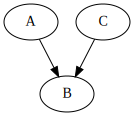

In [15]:
import graphviz as gv

graph = gv.Digraph()

graph.node('A')
graph.node('B')
graph.node('C')

graph.edge('A', 'B')
graph.edge('C', 'B')

graph

### Change Node Color

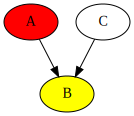

In [16]:
import graphviz as gv

graph = gv.Digraph()

graph.node('A', fillcolor='red', style='filled')
graph.node('B', fillcolor='yellow', style='filled')
graph.node('C')

graph.edge('A', 'B')
graph.edge('C', 'B')

graph

### Change Label

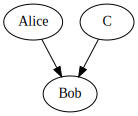

In [17]:
import graphviz as gv

graph = gv.Digraph()

# the first parameter is ID
graph.node('A', label='Alice')
graph.node('B', label='Bob')
graph.node('C')

graph.edge('A', 'B')
graph.edge('C', 'B')

graph